In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import timedelta

In [2]:
!pip install squarify

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import squarify

In [5]:
df = pd.read_csv('D_sample_data.csv', encoding = 'ISO-8859-1')

In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# RFM

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [9]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [11]:
df.shape

(541909, 8)

In [12]:
min(df['InvoiceDate'])

Timestamp('2010-12-01 08:26:00')

In [13]:
max(df['InvoiceDate'])

Timestamp('2011-12-09 12:50:00')

In [16]:
df = df.dropna()

In [17]:
len(df)

406829

In [18]:
df['total_price'] = df['Quantity'] * df['UnitPrice']

In [19]:
reference_date = max(df['InvoiceDate']) + timedelta(days=1)

In [20]:
reference_date

Timestamp('2011-12-10 12:50:00')

In [31]:
df_processed = df.groupby(['CustomerID']).agg({'InvoiceDate': lambda x: (reference_date - x.max()).days,
                                              'InvoiceNo': 'count',
                                              'total_price': 'sum'})

In [32]:
df_processed

,InvoiceDate,InvoiceNo,total_price
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,13,176.60


In [33]:
df_processed.columns = ['Recency', 'Frequency', 'Monetary']

In [34]:
df_processed.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


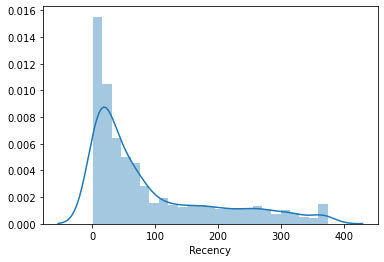

In [26]:
import seaborn as sns

sns.distplot(df_processed['Recency'])

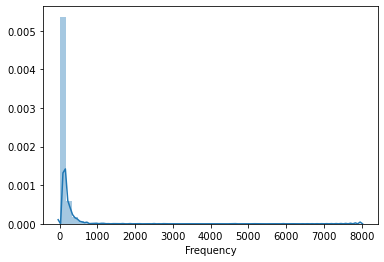

In [27]:
sns.distplot(df_processed['Frequency'])

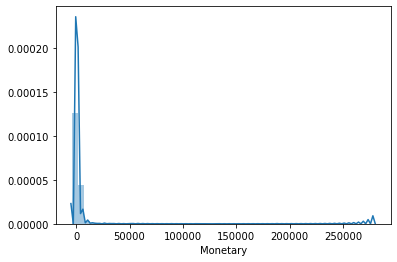

In [28]:
sns.distplot(df_processed['Monetary'])

In [39]:
r = range(4, 0, -1)
f = range(1, 5)
m = range(1, 5)

In [40]:
r

range(4, 0, -1)

In [42]:
for i in f:
    print(i)

1
2
3
4


In [43]:
r_g = pd.qcut(df_processed['Recency'], q=4, labels=r)
f_g = pd.qcut(df_processed['Frequency'], q=4, labels=f)
m_g = pd.qcut(df_processed['Monetary'], q=4, labels=m)

In [44]:
final_df = df_processed.assign(R = r_g.values, F = f_g.values, M = m_g.values)

In [45]:
final_df

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,326,2,0.00,1,1,1
12347.0,2,182,4310.00,4,4,4
12348.0,75,31,1797.24,2,2,4
12349.0,19,73,1757.55,3,3,4
12350.0,310,17,334.40,1,1,2
...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1
18281.0,181,7,80.82,1,1,1
18282.0,8,13,176.60,4,1,1


In [46]:
def combine_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])

In [47]:
final_df['combined'] = final_df.apply(combine_rfm, axis=1)

In [48]:
rfm = final_df

In [49]:
rfm.head()

,Recency,Frequency,Monetary,R,F,M,combined
CustomerID,,,,,,,
12346.0,326,2,0.00,1,1,1,111
12347.0,2,182,4310.00,4,4,4,444
12348.0,75,31,1797.24,2,2,4,224
12349.0,19,73,1757.55,3,3,4,334
12350.0,310,17,334.40,1,1,2,112


In [51]:
rfm['sum_val'] = rfm[['R', 'F', 'M']].sum(axis=1)

In [52]:
rfm

,Recency,Frequency,Monetary,R,F,M,combined,sum_val
CustomerID,,,,,,,,
12346.0,326,2,0.00,1,1,1,111,3.0
12347.0,2,182,4310.00,4,4,4,444,12.0
12348.0,75,31,1797.24,2,2,4,224,8.0
12349.0,19,73,1757.55,3,3,4,334,10.0
12350.0,310,17,334.40,1,1,2,112,4.0
...,...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,111,3.0
18281.0,181,7,80.82,1,1,1,111,3.0
18282.0,8,13,176.60,4,1,1,411,6.0


In [50]:
rfm['combined'].nunique()

62

In [55]:
def rfm_level(df):
    if df['sum_val'] >= 9:
        return 'Can\'t Loose Them'
    elif ((df['sum_val'] >= 8) and (df['sum_val'] < 9)):
        return 'Champions'
    elif ((df['sum_val'] >= 7) and (df['sum_val'] < 8)):
        return 'Loyal'
    elif ((df['sum_val'] >= 6) and (df['sum_val'] < 7)):
        return 'Potential'
    elif ((df['sum_val'] >= 5) and (df['sum_val'] < 6)):
        return 'Promising'
    elif ((df['sum_val'] >= 4) and (df['sum_val'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'

In [56]:
rfm['rfm_level'] = rfm.apply(rfm_level, axis=1)

In [57]:
rfm

,Recency,Frequency,Monetary,R,F,M,combined,sum_val,rfm_level
CustomerID,,,,,,,,,
12346.0,326,2,0.00,1,1,1,111,3.0,Require Activation
12347.0,2,182,4310.00,4,4,4,444,12.0,Can't Loose Them
12348.0,75,31,1797.24,2,2,4,224,8.0,Champions
12349.0,19,73,1757.55,3,3,4,334,10.0,Can't Loose Them
12350.0,310,17,334.40,1,1,2,112,4.0,Needs Attention
...,...,...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,111,3.0,Require Activation
18281.0,181,7,80.82,1,1,1,111,3.0,Require Activation
18282.0,8,13,176.60,4,1,1,411,6.0,Potential


In [62]:
rfm_level_agg = rfm.groupby('rfm_level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)

In [63]:
rfm_level_agg

Recency Frequency Monetary      
                      mean      mean     mean count
rfm_level                                          
Can't Loose Them      25.2     195.1   4130.3  1690
Champions             62.7      57.0    974.7   467
Loyal                 78.8      39.7    724.2   447
Needs Attention      174.5      13.9    227.1   391
Potential             94.3      28.5    491.8   468
Promising            153.0      21.2    346.8   517
Require Activation   264.8       7.8    109.1   392

In [64]:
rfm_level_agg.columns = rfm_level_agg.columns.droplevel()
rfm_level_agg.columns = ['Recency_Mean', 'Frequency_Mean', 'Monetary_Mean', 'Count']

In [65]:
rfm_level_agg

,Recency_Mean,Frequency_Mean,Monetary_Mean,Count
rfm_level,,,,
Can't Loose Them,25.2,195.1,4130.3,1690
Champions,62.7,57.0,974.7,467
Loyal,78.8,39.7,724.2,447
Needs Attention,174.5,13.9,227.1,391
Potential,94.3,28.5,491.8,468
Promising,153.0,21.2,346.8,517
Require Activation,264.8,7.8,109.1,392


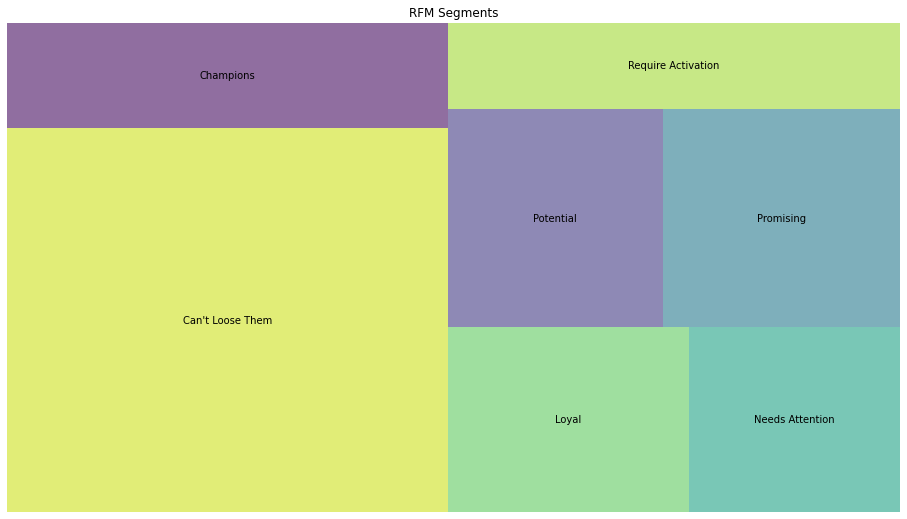

In [66]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=rfm_level_agg['Count'], 
              label=['Can\'t Loose Them',
                     'Champions',
                     'Loyal',
                     'Needs Attention',
                     'Potential', 
                     'Promising', 
                     'Require Activation'], alpha=.6 )
plt.title('RFM Segments')
plt.axis('off')
plt.show()